In [128]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

df1 = pd.read_csv(r'LFB+Incident+data+from+January+2017.csv', sep = ';')
df2 = pd.read_csv(r'LFB+Mobilisation+data+from+January+2017.csv', sep = ';')
df = df2.merge(df1, on = 'IncidentNumber')
df = df[['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall',
         'HourOfCall', 'IncidentGroup','PropertyCategory', 'PropertyType','AddressQualifier', 'Postcode_full',
         'Postcode_district', 'UPRN','USRN', 'IncGeo_BoroughCode', 'IncGeo_BoroughName', 'ProperCase','IncGeo_WardCode', 
         'IncGeo_WardName', 'IncGeo_WardNameNew', 'Latitude', 'Longitude', 'IncidentStationGround', 
         'FirstPumpArriving_DeployedFromStation','SecondPumpArriving_DeployedFromStation', 'NumStationsWithPumpsAttending',
         'NumPumpsAttending', 'PumpCount', 'DateAndTimeMobilised', 'DateAndTimeMobile','DateAndTimeArrived', 
         'DeployedFromStation_Code', 'DeployedFromStation_Name','DeployedFromLocation', 'PumpOrder', 'DelayCodeId', 
         'DelayCode_Description']]

df.head()

C:\Users\clair\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,...,PumpCount,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,DelayCodeId,DelayCode_Description
0,000004-01012017,01/01/2017,2017,00:06:18,0,False Alarm,Non Residential,Engineering manufacturing plant,Nearby address - street not listed in gazetteer,SE2 9SG,...,1.0,01/01/2017 00:06,01/01/2017 00:08,01/01/2017 00:20,E25,Plumstead,Home Station,1,9.0,"Traffic, roadworks, etc"
1,000005-01012017,01/01/2017,2017,00:06:34,0,Special Service,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,NaN,...,1.0,01/01/2017 00:06,01/01/2017 00:07,01/01/2017 00:10,A23,Euston,Home Station,1,NaN,NaN
2,000006-01012017,01/01/2017,2017,00:07:57,0,Fire,Non Residential,Restaurant/cafe,Correct incident location,IG11 8TB,...,2.0,01/01/2017 00:07,01/01/2017 00:09,01/01/2017 00:12,F43,Barking,Home Station,1,NaN,NaN
3,000008-01012017,01/01/2017,2017,00:12:44,0,Fire,Outdoor,Loose refuse,On land associated with building,UB6 8LY,...,2.0,01/01/2017 00:12,01/01/2017 00:13,01/01/2017 00:19,G31,Northolt,Home Station,1,12.0,Not held up
4,000008-01012017,01/01/2017,2017,00:12:44,0,Fire,Outdoor,Loose refuse,On land associated with building,UB6 8LY,...,2.0,01/01/2017 00:12,01/01/2017 00:14,01/01/2017 00:19,G31,Northolt,Home Station,2,NaN,NaN


In [129]:
df['DateAndTimeMobilised'] = pd.to_datetime(df['DateAndTimeMobilised'])
df['DateAndTimeArrived'] = pd.to_datetime(df['DateAndTimeArrived'])
df['ResponseTime'] = df['DateAndTimeArrived'] - df['DateAndTimeMobilised']
# df.head()
# df.describe()
# df.info()

In [130]:
df['ResponseTimeMinute'] = df['ResponseTime'].dt.total_seconds()/60
# df.head()

# On cherche les temps de réponse négatifs
# df_new = df[df['ResponseTimeMinute'] < 0] # Il y a 128 incidents concernés (0.02 % des données)

# On cherche les temps de réponse aberrants Ex : ici supérieurs à 1h (60 min)
# df_new = df[df['ResponseTimeMinute'] > 60] # Il y a 679 incidents concernés (0.11 % des données)

# On supprime les incidents pour lesquels le temps de réponse est négatif ou supérieur à 1h (60 min)
df = df[(df['ResponseTimeMinute'] > 0) & (df['ResponseTimeMinute'] < 60)]
# df.info()
# df['ResponseTimeMinute'].describe()

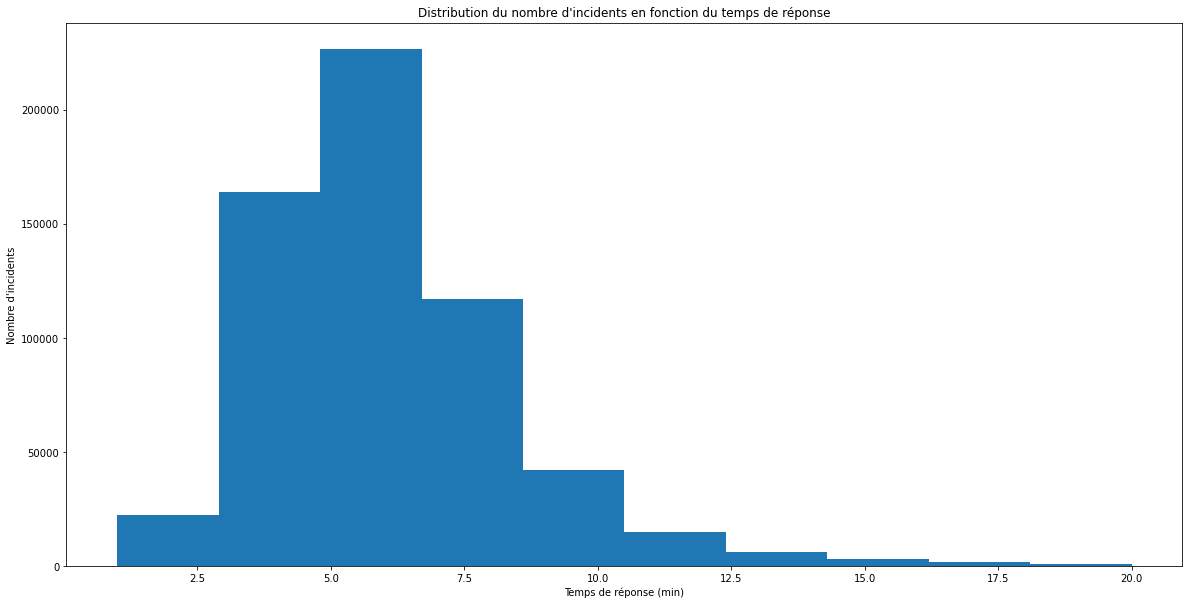

In [131]:
# Visualisation du temps de réponse
plt.figure(figsize=(20,10))
plt.hist(df['ResponseTimeMinute'])
plt.xlabel('Temps de réponse (min)')
plt.ylabel('Nombre d\'incidents')
plt.title('Distribution du nombre d\'incidents en fonction du temps de réponse');


In [132]:
# Distribution des valeurs :

# DateOfCall
# df['DateOfCall'].describe()
# sns.countplot(x = 'DateOfCall', data = df); 
# Nombre d'incidents plutôt régulier même s'il semble y avoir une périodicité selon les mois de l'année.
# Il y a un jour où le nombre d'incidents est bien supérieur aux autres jours.
# df.DateOfCall.value_counts().sort_values(ascending=False).head(5)
# Il y a 985 incidents le 03/03/2018 et 669 le 02/03/2018.

# CalYear
# plt.figure(figsize=(20,10))
# plt.hist(df['CalYear'], bins = 4, rwidth = 0.6)
# df.CalYear.value_counts().sort_values(ascending=False)
# Nombre d'incidents stable selon les années, entre 146 000 et 153 000 indicents / an.


# HourOfCall
# plt.figure(figsize=(20,10))
# plt.hist(df['HourOfCall'], bins = 24, rwidth = 0.6);
# Peu d'incidents dans la nuit (entre 01h et 6h) puis augmentation tout au long de la journée jusqu'à atteindre un pic 
# à 18-19h.

# IncidentGroup
# sns.countplot(x = 'IncidentGroup', data = df);
# df.IncidentGroup.value_counts(normalize=True).sort_values(ascending=False)
# Grand nombre de 'False Alarm' (60%) contre 20% pour 'Special Service' et 'Fire'

# PropertyCategory
# sns.countplot(x = 'PropertyCategory', data = df);
# df.PropertyCategory.value_counts(normalize=True).sort_values(ascending=False)
# La majorité des incidents ont lieu dans des habitations (Dwelling 56%) et bâtiments non résidentiels (Non Residential 19%).

# PropertyType
# sns.countplot(x = 'PropertyType', data = df);
# df.PropertyType.value_counts(normalize=True).sort_values(ascending=False).head(10)
# Les 3 types de propriétés où le nombre d'incidents est le plus important sont : 
# - Purpose Built Flats/Maisonettes - 4 to 9 storeys (14%)
# - House - single occupancy (12%)
# - Purpose Built Flats/Maisonettes - Up to 3 storeys (10%)

# AddressQualifier
# sns.countplot(x = 'AddressQualifier', data = df);
# df.AddressQualifier.value_counts(normalize=True).sort_values(ascending=False)
# Dans la majorité des cas, le lieu indiqué est correct ('Correct incident location' 62%) ou pas exact mais indiqué dans le 
# bon bâtiment ('Within same building' 20%)

# Postcode_full
# sns.countplot(x = 'Postcode_full', data = df);
# df.Postcode_full.value_counts(normalize=True).sort_values(ascending=False).head()
# Trop de données différentes, ne fonctionne pas.

# Postcode_district
# sns.countplot(x = 'Postcode_district', data = df);
# df.Postcode_district.value_counts(normalize=True).sort_values(ascending=False).head()
# Les 5 disctricts où le nombre d'incidents est le plus important sont : 
# - CR0    0.020247
# - SE1    0.015321
# - E1     0.015290
# - NW1    0.014436
# - E14    0.013583

# UPRN

# USRN

# IncGeo_BoroughCode
# sns.countplot(x = 'IncGeo_BoroughCode', data = df);
# df.IncGeo_BoroughCode.value_counts(normalize=True).sort_values(ascending=False).head()
# Les 5 arrondissements (code géographique) où le nombre d'incidents est le plus important sont :
# - E09000033    0.078355
# - E09000007    0.047220
# - E09000028    0.045497
# - E09000030    0.043081
# - E09000022    0.040948

# IncGeo_BoroughName
# sns.countplot(x = 'IncGeo_BoroughName', data = df);
# df.IncGeo_BoroughName.value_counts(normalize=True).sort_values(ascending=False).head()
# Les 5 arrondissements où le nombre d'incidents est le plus important sont :
# - WESTMINSTER      0.078355
# - CAMDEN           0.047220
# - SOUTHWARK        0.045497
# - TOWER HAMLETS    0.043081
# - LAMBETH          0.040948

# ProperCase
# sns.countplot(x = 'ProperCase', data = df);
# df.ProperCase.value_counts(normalize=True).sort_values(ascending=False).head()
# Résultats identiques à IncGeo_BoroughName

# IncGeo_WardCode
# sns.countplot(x = 'IncGeo_WardCode', data = df);
# df.IncGeo_WardCode.value_counts(normalize=True).sort_values(ascending=False).head()
# Les 5 ward (code) où le nombre d'incidents est le plus important sont :
# - E05000649    0.014255
# - E05000644    0.012968
# - E05000448    0.006540
# - E05000634    0.006517
# - E05000138    0.006237

# IncGeo_WardName
# sns.countplot(x = 'IncGeo_WardName', data = df);
# df.IncGeo_WardName.value_counts(normalize=True).sort_values(ascending=False).head()
# Les 5 ward (Name) où le nombre d'incidents est le plus important sont :
# - WEST END            0.014253
# - ST. JAMES'S         0.012968
# - REGENT'S PARK       0.007293
# - LEWISHAM CENTRAL    0.006540
# - CHURCH STREET       0.006517
# Supprimer cette variable et conserver uniquement 'IncGeo_WardNameNew' ?

# IncGeo_WardNameNew
# sns.countplot(x = 'IncGeo_WardNameNew', data = df);
# df.IncGeo_WardNameNew.value_counts(normalize=True).sort_values(ascending=False).head()
# Les 5 ward (Name) où le nombre d'incidents est le plus important sont :
# - WEST END            0.014253
# - ST. JAMES'S         0.012968
# - REGENT'S PARK       0.007293
# - LEWISHAM CENTRAL    0.006540
# - CHURCH STREET       0.006517

# Latitude
# Longitude

# IncidentStationGround
# sns.countplot(x = 'IncidentStationGround', data = df);
# df.IncidentStationGround.value_counts(normalize=True).sort_values(ascending=False).head()
# Les 5 casernes réalisant le plus grand nombre d'interventions sont : 
# - Soho          0.031086
# - Paddington    0.028931
# - Euston        0.021890
# - Lambeth       0.019232
# - Chelsea       0.018877

# SecondPumpArriving_DeployedFromStation
# sns.countplot(x = 'SecondPumpArriving_DeployedFromStation', data = df);
# df.SecondPumpArriving_DeployedFromStation.value_counts(normalize=True).sort_values(ascending=False).head()
# Les 5 casernes étant les plus déployées en renfort sont :
# - Paddington          0.030485
# - Soho                0.029703
# - Lambeth             0.024937
# - Hammersmith         0.024375
# - North Kensington    0.024179

# NumStationsWithPumpsAttending
# plt.figure(figsize=(20,10))
# plt.hist(df['NumStationsWithPumpsAttending'], rwidth = 0.7);
# df.NumStationsWithPumpsAttending.value_counts(normalize=True).sort_values(ascending=False)
# Revoir définition de la variable (Majorité 1 et 2)

# NumPumpsAttending
# plt.figure(figsize=(20,10))
# plt.hist(df['NumPumpsAttending'], rwidth = 0.7);
# df.NumPumpsAttending.value_counts(normalize=True).sort_values(ascending=False)
# Revoir définition de la variable (Majorité 2 et 1)

# PumpCount
# sns.countplot(x = 'PumpCount', data = df);
# df.PumpCount.value_counts(normalize=True).sort_values(ascending=False).head()
# Revoir définition de la variable (Majorité 2 et 1)

# DateAndTimeMobilised

# DateAndTimeMobile

# DateAndTimeArrived

# DeployedFromStation_Code
# sns.countplot(x = 'DeployedFromStation_Code', data = df);
# df.DeployedFromStation_Code.value_counts(normalize=True).sort_values(ascending=False).head()
# Les 5 casernes (code) réalisant le plus grand nombre d'interventions sont :
# - A24    0.035939
# - A21    0.023883
# - H22    0.021657
# - G27    0.019569
# - A41    0.019059

# DeployedFromStation_Name
# sns.countplot(x = 'DeployedFromStation_Name', data = df);
# df.DeployedFromStation_Name.value_counts(normalize=True).sort_values(ascending=False).head()
# Les 5 casernes (code) réalisant le plus grand nombre d'interventions sont :
# - Soho                0.035939
# - Paddington          0.023883
# - Lambeth             0.021657
# - North Kensington    0.019569
# - West Hampstead      0.019059
# Résultats quelque peu différents de IncidentStationGround (Revoir la différence entre les 2 variables)

# DeployedFromLocation
# sns.countplot(x = 'DeployedFromLocation', data = df);
# df.DeployedFromLocation.value_counts(normalize=True).sort_values(ascending=False).head()
# Lors de l'intervention, les pompiers étaient à leur caserne (97%).

# DelayCodeId
# sns.countplot(x = 'DelayCodeId', data = df);
# df.DelayCodeId.value_counts(normalize=True).sort_values(ascending=False).head()
# Aucune interprétation, la description semble suffisante --> Variable à supprimer ?

# DelayCode_Description
# sns.countplot(x = 'DelayCode_Description', data = df);
# df.DelayCode_Description.value_counts(normalize=True).sort_values(ascending=False).head()
# Lorsqu'il y a un retard d'intervention, les raisons principales sont : 
# - Not held up                           0.570584
# - Traffic, roadworks, etc               0.223271